<a href="https://colab.research.google.com/github/Travistyse/Travistyse.github.io/blob/master/CatAdoption_BuildWk1_TravisFoster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this project is to determine what factors play a role in cat adoption rates using data from the Austin Animal Center Shelter's dataset which can be found [here](https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and#aac_shelter_cat_outcome_eng.csv) - I'm using the dataset that's been engineered for the outcome analysis I'm about to do. 

I hope to present visualizations and insights which are interesting enough to overcome what I presume must be at least a handful of other similar reports. I've chosen not to read them for the sake of not demotivating myself or feeling unoriginal given that the most important aspect of this analysis is the fact that I'm doing it and the outcome is meeting or exceeding expectations.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
file_path = "/content/drive/My Drive/Lambda/Unit 1/Build/Updated Datasets/Austin_Animal_Center_Outcomes.csv"
file_path_in = "/content/drive/My Drive/Lambda/Unit 1/Build/Updated Datasets/Austin_Animal_Center_Intakes.csv"
shelter_df = pd.read_csv(file_path)
shelter_df_in = pd.read_csv(file_path_in)

In [4]:
shelter_df.head(10)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A789027,Lennie,02/17/2019 11:44:00 AM,02/17/2019 11:44:00 AM,02/13/2017,Adoption,NaN,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream
1,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
2,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
3,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
4,A680969,*Zeus,08/05/2014 04:59:00 PM,08/05/2014 04:59:00 PM,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby
5,A684617,NaN,07/27/2014 09:00:00 AM,07/27/2014 09:00:00 AM,07/26/2012,Transfer,SCRP,Cat,Intact Female,2 years,Domestic Shorthair Mix,Black
6,A742354,Artemis,01/22/2017 11:56:00 AM,01/22/2017 11:56:00 AM,01/20/2010,Return to Owner,NaN,Cat,Neutered Male,7 years,Domestic Shorthair Mix,Blue/White
7,A681036,NaN,06/11/2014 05:11:00 PM,06/11/2014 05:11:00 PM,06/09/2014,Transfer,Partner,Cat,Intact Male,2 days,Domestic Shorthair Mix,Brown Tabby
8,A698049,Luigi,03/16/2015 02:50:00 PM,03/16/2015 02:50:00 PM,06/05/2014,Transfer,Partner,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White
9,A789027,Lennie,03/10/2019 12:25:00 PM,03/10/2019 12:25:00 PM,02/13/2017,Adoption,NaN,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream


In [5]:
shelter_df['Animal Type'].value_counts()

Dog          64536
Cat          42999
Other         5834
Bird           537
Livestock       18
Name: Animal Type, dtype: int64

In [0]:
#df = df[df.line_race != 0]
condition = shelter_df['Animal Type'] == 'Cat'
shelter_df['Animal Type'] = shelter_df['Animal Type'][condition]

In [7]:
shelter_df['Animal Type'].value_counts()

Cat    42999
Name: Animal Type, dtype: int64

In [8]:
shelter_df_in.head(10)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,A743852,Odin,02/18/2017 12:46:00 PM,02/18/2017 12:46:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate
6,A635072,Beowulf,04/16/2019 09:53:00 AM,04/16/2019 09:53:00 AM,415 East Mary Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6 years,Great Dane Mix,Black
7,A708452,Mumble,07/30/2015 02:37:00 PM,07/30/2015 02:37:00 PM,Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Labrador Retriever Mix,Black/White
8,A774147,NaN,06/11/2018 07:45:00 AM,06/11/2018 07:45:00 AM,6600 Elm Creek in Austin (TX),Stray,Injured,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Black/White
9,A731435,*Casey,08/08/2016 05:52:00 PM,08/08/2016 05:52:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Cream Tabby


In [0]:
#df = df[df.line_race != 0]
condition = shelter_df_in['Animal Type'] == 'Cat'
shelter_df_in['Animal Type'] = shelter_df_in['Animal Type'][condition]

In [10]:
shelter_df_in['Animal Type'].value_counts()

Cat    42833
Name: Animal Type, dtype: int64

In [11]:
shelter_df['Outcome Type'].value_counts()

Adoption           50074
Transfer           34010
Return to Owner    20065
Euthanasia          7625
Died                1047
Rto-Adopt            556
Disposal             452
Missing               67
Relocate              20
Name: Outcome Type, dtype: int64

I'm now going to merge these based on Animal ID after renaming some columns to avoid conflicts

In [0]:
shelter_df_in.rename(columns={"DateTime": "Intake DateTime"}, inplace = True)
#.rename(columns = {'test':'TEST'}, inplace = True) 
#shelter_df_in.rename(index={2: "Intake DateTime"})

In [13]:
#shelter_df_in['Intake Datetime']
list(shelter_df_in.columns.values)

['Animal ID',
 'Name',
 'Intake DateTime',
 'MonthYear',
 'Found Location',
 'Intake Type',
 'Intake Condition',
 'Animal Type',
 'Sex upon Intake',
 'Age upon Intake',
 'Breed',
 'Color']

In [14]:
list(shelter_df.columns.values)

['Animal ID',
 'Name',
 'DateTime',
 'MonthYear',
 'Date of Birth',
 'Outcome Type',
 'Outcome Subtype',
 'Animal Type',
 'Sex upon Outcome',
 'Age upon Outcome',
 'Breed',
 'Color']

In [15]:
'''
merged = (
    df_products[['product_id', 'product_name']]
    .merge(order_products__prior[['order_id', 'product_id']])
)

merged = (
    shelter_df[['Animal ID', 'product_name']]
    .merge(shelter_df_in[['Animal ID', 'product_id']])
)
'''
result = pd.merge(shelter_df,
                  shelter_df_in[['Animal ID', 'Intake Type', 'Intake DateTime', 'Sex upon Intake', 'Age upon Intake']],
                  on = 'Animal ID',
                  how = 'inner'
)
result.head(10)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Intake Type,Intake DateTime,Sex upon Intake,Age upon Intake
0,A789027,Lennie,02/17/2019 11:44:00 AM,02/17/2019 11:44:00 AM,02/13/2017,Adoption,NaN,NaN,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream,Stray,02/13/2019 01:17:00 PM,Neutered Male,2 years
1,A789027,Lennie,02/17/2019 11:44:00 AM,02/17/2019 11:44:00 AM,02/13/2017,Adoption,NaN,NaN,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream,Owner Surrender,03/05/2019 05:14:00 PM,Neutered Male,2 years
2,A789027,Lennie,03/10/2019 12:25:00 PM,03/10/2019 12:25:00 PM,02/13/2017,Adoption,NaN,NaN,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream,Stray,02/13/2019 01:17:00 PM,Neutered Male,2 years
3,A789027,Lennie,03/10/2019 12:25:00 PM,03/10/2019 12:25:00 PM,02/13/2017,Adoption,NaN,NaN,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream,Owner Surrender,03/05/2019 05:14:00 PM,Neutered Male,2 years
4,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,NaN,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,Stray,02/08/2016 11:05:00 AM,Intact Male,4 months
5,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,NaN,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,Owner Surrender,02/15/2016 10:37:00 AM,Neutered Male,4 months
6,A720371,Moose,02/15/2016 12:00:00 AM,02/15/2016 12:00:00 AM,10/08/2015,Transfer,Partner,NaN,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,Stray,02/08/2016 11:05:00 AM,Intact Male,4 months
7,A720371,Moose,02/15/2016 12:00:00 AM,02/15/2016 12:00:00 AM,10/08/2015,Transfer,Partner,NaN,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,Owner Surrender,02/15/2016 10:37:00 AM,Neutered Male,4 months
8,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,Stray,03/18/2014 07:11:00 AM,Intact Male,6 days
9,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,Stray,10/08/2014 04:39:00 PM,Intact Male,2 months


Now let's ditch all the freaking Mooses c:

In [16]:
result['Animal Type'].value_counts()

Cat    46826
Name: Animal Type, dtype: int64

Nah, just gotta kill some NaNs C:

In [0]:
result = result.dropna(subset=['Animal Type'])

In [18]:
result.head(10)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Intake Type,Intake DateTime,Sex upon Intake,Age upon Intake
8,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,Stray,03/18/2014 07:11:00 AM,Intact Male,6 days
9,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,Stray,10/08/2014 04:39:00 PM,Intact Male,2 months
10,A680969,*Zeus,08/05/2014 04:59:00 PM,08/05/2014 04:59:00 PM,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby,Stray,06/10/2014 05:53:00 PM,Intact Male,1 week
11,A684617,NaN,07/27/2014 09:00:00 AM,07/27/2014 09:00:00 AM,07/26/2012,Transfer,SCRP,Cat,Intact Female,2 years,Domestic Shorthair Mix,Black,Stray,07/26/2014 11:34:00 AM,Intact Female,2 years
12,A742354,Artemis,01/22/2017 11:56:00 AM,01/22/2017 11:56:00 AM,01/20/2010,Return to Owner,NaN,Cat,Neutered Male,7 years,Domestic Shorthair Mix,Blue/White,Stray,01/20/2017 12:28:00 PM,Neutered Male,7 years
13,A681036,NaN,06/11/2014 05:11:00 PM,06/11/2014 05:11:00 PM,06/09/2014,Transfer,Partner,Cat,Intact Male,2 days,Domestic Shorthair Mix,Brown Tabby,Stray,06/11/2014 03:46:00 PM,Intact Male,2 days
14,A698049,Luigi,03/16/2015 02:50:00 PM,03/16/2015 02:50:00 PM,06/05/2014,Transfer,Partner,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Public Assist,03/16/2015 06:48:00 PM,Spayed Female,9 months
15,A698049,Luigi,03/16/2015 02:50:00 PM,03/16/2015 02:50:00 PM,06/05/2014,Transfer,Partner,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Owner Surrender,03/05/2015 01:01:00 PM,Spayed Female,8 months
16,A698049,Luigi,03/27/2015 11:51:00 AM,03/27/2015 11:51:00 AM,06/05/2014,Return to Owner,NaN,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Public Assist,03/16/2015 06:48:00 PM,Spayed Female,9 months
17,A698049,Luigi,03/27/2015 11:51:00 AM,03/27/2015 11:51:00 AM,06/05/2014,Return to Owner,NaN,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Owner Surrender,03/05/2015 01:01:00 PM,Spayed Female,8 months


Now to un-break my code by setting shelter_df to result (:

In [0]:
shelter_df = result

In [0]:
# I won't be using these c:
shelter_df = shelter_df.drop( [ 'Animal ID', 'Animal Type' ], axis=1 )

Age Upon Outcome is formatted in a way that's unusable without code that would take longer to write than simply creating a new column with proper date-time formatting.. so that's what I'm doing now (:

In [0]:
#shelter_df['DateTime'] = pd.to_datetime( shelter_df['DateTime'] )
#shelter_df['Date of Birth'] = pd.to_datetime( shelter_df['Date of Birth'] )
shelter_df['DateTime'] = shelter_df['DateTime'].apply(pd.to_datetime)
#shelter_df.loc['DateTime'] = pd.to_datetime( shelter_df.loc['DateTime'] )
#shelter_df.loc['Date of Birth'] = pd.to_datetime( shelter_df.loc['Date of Birth'] )

In [0]:
shelter_df['Date of Birth'] = shelter_df['Date of Birth'].apply(pd.to_datetime)

In [0]:
shelter_df['Intake DateTime'] = shelter_df['Intake DateTime'].apply(pd.to_datetime)

In [0]:
#shelter_df['date'] = pd.to_datetime(shelter_df['date'])
#shelter_df['Age Upon Outcome DT'] = ( pd.to_datetime( shelter_df['DateTime'] ) - pd.to_datetime( shelter_df['Date of Birth'] ) )
#shelter_df['Age Upon Outcome DT'] = ( shelter_df['DateTime'] - shelter_df['Date of Birth'] )
shelter_df_temp = shelter_df


In [25]:
shelter_df['DateTime'].dtype

dtype('<M8[ns]')

In [0]:
shelter_df_temp['Age Upon Outcome DT'] = ( shelter_df['DateTime'] - shelter_df['Date of Birth'] )

In [0]:
shelter_df_temp['Duration Of Stay'] = ( shelter_df['DateTime'] - shelter_df['Intake DateTime'] )


In [28]:
shelter_df_temp.head(10)

,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,Breed,Color,Intake Type,Intake DateTime,Sex upon Intake,Age upon Intake,Age Upon Outcome DT,Duration Of Stay
8,NaN,2014-03-18 11:47:00,03/18/2014 11:47:00 AM,2014-03-12,Transfer,Partner,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,Stray,2014-03-18 07:11:00,Intact Male,6 days,6 days 11:47:00,0 days 04:36:00
9,*Donatello,2014-10-18 18:52:00,10/18/2014 06:52:00 PM,2014-08-01,Adoption,NaN,Neutered Male,2 months,Domestic Shorthair Mix,Black,Stray,2014-10-08 16:39:00,Intact Male,2 months,78 days 18:52:00,10 days 02:13:00
10,*Zeus,2014-08-05 16:59:00,08/05/2014 04:59:00 PM,2014-06-03,Adoption,NaN,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby,Stray,2014-06-10 17:53:00,Intact Male,1 week,63 days 16:59:00,55 days 23:06:00
11,NaN,2014-07-27 09:00:00,07/27/2014 09:00:00 AM,2012-07-26,Transfer,SCRP,Intact Female,2 years,Domestic Shorthair Mix,Black,Stray,2014-07-26 11:34:00,Intact Female,2 years,731 days 09:00:00,0 days 21:26:00
12,Artemis,2017-01-22 11:56:00,01/22/2017 11:56:00 AM,2010-01-20,Return to Owner,NaN,Neutered Male,7 years,Domestic Shorthair Mix,Blue/White,Stray,2017-01-20 12:28:00,Neutered Male,7 years,2559 days 11:56:00,1 days 23:28:00
13,NaN,2014-06-11 17:11:00,06/11/2014 05:11:00 PM,2014-06-09,Transfer,Partner,Intact Male,2 days,Domestic Shorthair Mix,Brown Tabby,Stray,2014-06-11 15:46:00,Intact Male,2 days,2 days 17:11:00,0 days 01:25:00
14,Luigi,2015-03-16 14:50:00,03/16/2015 02:50:00 PM,2014-06-05,Transfer,Partner,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Public Assist,2015-03-16 18:48:00,Spayed Female,9 months,284 days 14:50:00,-1 days +20:02:00
15,Luigi,2015-03-16 14:50:00,03/16/2015 02:50:00 PM,2014-06-05,Transfer,Partner,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Owner Surrender,2015-03-05 13:01:00,Spayed Female,8 months,284 days 14:50:00,11 days 01:49:00
16,Luigi,2015-03-27 11:51:00,03/27/2015 11:51:00 AM,2014-06-05,Return to Owner,NaN,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Public Assist,2015-03-16 18:48:00,Spayed Female,9 months,295 days 11:51:00,10 days 17:03:00
17,Luigi,2015-03-27 11:51:00,03/27/2015 11:51:00 AM,2014-06-05,Return to Owner,NaN,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Owner Surrender,2015-03-05 13:01:00,Spayed Female,8 months,295 days 11:51:00,21 days 22:50:00


In [29]:
shelter_df['Outcome Type'].value_counts()

Adoption           21768
Transfer           19885
Return to Owner     2506
Euthanasia          1834
Died                 631
Rto-Adopt            119
Disposal              45
Missing               38
Name: Outcome Type, dtype: int64

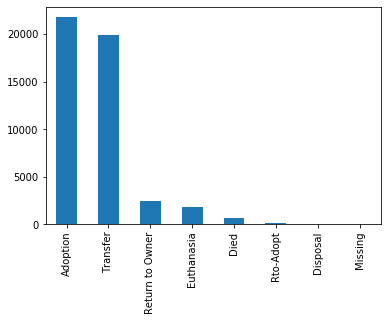

In [30]:
shelter_df['Outcome Type'].value_counts().plot.bar();

In [0]:
shelter_df = shelter_df_temp

In [32]:
condition = shelter_df['Outcome Type'] == 'Adopted'
shelter_df['Outcome Type'][condition]

Series([], Name: Outcome Type, dtype: object)

In [33]:
shelter_df['DateTime'].dt.month.value_counts().sort_index()

1     2661
2     1958
3     2251
4     2785
5     4079
6     5576
7     5660
8     5127
9     4483
10    4491
11    4076
12    3679
Name: DateTime, dtype: int64

In [34]:
shelter_df['DateTime'][condition]

Series([], Name: DateTime, dtype: datetime64[ns])

In [35]:
adopted_slice = shelter_df['DateTime'][condition]
adopted_slice.head(10)

Series([], Name: DateTime, dtype: datetime64[ns])

In [36]:
adopted_slice.dt.month

Series([], Name: DateTime, dtype: int64)

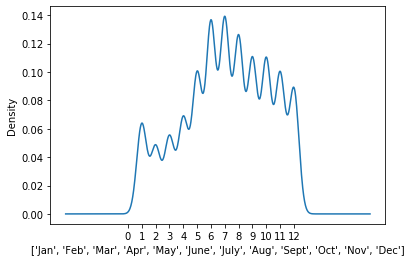

In [37]:
#shelter_df['Age upon Outcome'].plot.density();
#pd.to_datetime(shelter_df['DateTime'][condition]).dt.month.plot.density();
plt.xticks(np.arange(0, 13, 1.0))
plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
#shelter_df['DateTime'][condition].dt.month.plot.density();
#adopted_slice.dt.month.plot.density();
shelter_df['DateTime'].dt.month.plot.density();
plt.show()

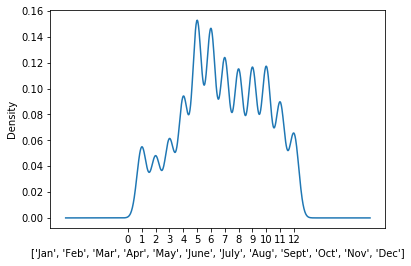

In [38]:
plt.xticks(np.arange(0, 13, 1.0))
plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

shelter_df['Intake DateTime'].dt.month.plot.density();
plt.show()

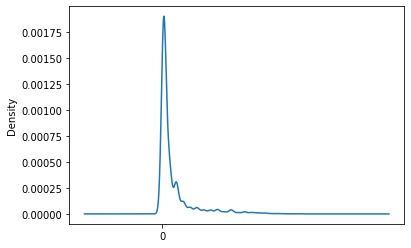

In [39]:
plt.xticks(np.arange(0, 5, 90.0))
#plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
shelter_df['Age Upon Outcome DT'].dt.days.plot.density();
#shelter_df['Intake DateTime'].dt.month.plot.density();
plt.show()

In [0]:
condition = shelter_df['Outcome Type'] == 'Adoption'
shelter_df['Outcome Type'] = shelter_df['Outcome Type'][condition]

I'm noticing that the data shows a signficant portion of cats which are adopted are between 0 and 1 years old, followed by a preference order of roughly 1 - 4 years, and from there it seems like if you're willing to adopt an older cat than that it no longer matters all that much how old the cat is - I hypothesize, even, that the low number of cats available in the after 13 year range may be the reason for the drop off. Lots of data exploration lies ahead!

I want to start by normalizing the data around population age - so that the fewer number of older cats (if even true) doesn't impact the data with a significant bias toward younger cats - even though I strongly believe that in the real world such a bias does exist, I don't need to inflate that bias by infusing it with a selection bias as well.

I'm not entirely sure if this dataset even has the data I need to normalize, but I'm going to try nonetheless! :D

Actually, it has to - this dataset includes ALL cats - not just those that were adopted - and therefor my initial paragraph is based in error - this is the total population age density - not just those that were adopted.

In [41]:
shelter_df.head(10)

,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,Breed,Color,Intake Type,Intake DateTime,Sex upon Intake,Age upon Intake,Age Upon Outcome DT,Duration Of Stay
8,NaN,2014-03-18 11:47:00,03/18/2014 11:47:00 AM,2014-03-12,NaN,Partner,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,Stray,2014-03-18 07:11:00,Intact Male,6 days,6 days 11:47:00,0 days 04:36:00
9,*Donatello,2014-10-18 18:52:00,10/18/2014 06:52:00 PM,2014-08-01,Adoption,NaN,Neutered Male,2 months,Domestic Shorthair Mix,Black,Stray,2014-10-08 16:39:00,Intact Male,2 months,78 days 18:52:00,10 days 02:13:00
10,*Zeus,2014-08-05 16:59:00,08/05/2014 04:59:00 PM,2014-06-03,Adoption,NaN,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby,Stray,2014-06-10 17:53:00,Intact Male,1 week,63 days 16:59:00,55 days 23:06:00
11,NaN,2014-07-27 09:00:00,07/27/2014 09:00:00 AM,2012-07-26,NaN,SCRP,Intact Female,2 years,Domestic Shorthair Mix,Black,Stray,2014-07-26 11:34:00,Intact Female,2 years,731 days 09:00:00,0 days 21:26:00
12,Artemis,2017-01-22 11:56:00,01/22/2017 11:56:00 AM,2010-01-20,NaN,NaN,Neutered Male,7 years,Domestic Shorthair Mix,Blue/White,Stray,2017-01-20 12:28:00,Neutered Male,7 years,2559 days 11:56:00,1 days 23:28:00
13,NaN,2014-06-11 17:11:00,06/11/2014 05:11:00 PM,2014-06-09,NaN,Partner,Intact Male,2 days,Domestic Shorthair Mix,Brown Tabby,Stray,2014-06-11 15:46:00,Intact Male,2 days,2 days 17:11:00,0 days 01:25:00
14,Luigi,2015-03-16 14:50:00,03/16/2015 02:50:00 PM,2014-06-05,NaN,Partner,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Public Assist,2015-03-16 18:48:00,Spayed Female,9 months,284 days 14:50:00,-1 days +20:02:00
15,Luigi,2015-03-16 14:50:00,03/16/2015 02:50:00 PM,2014-06-05,NaN,Partner,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Owner Surrender,2015-03-05 13:01:00,Spayed Female,8 months,284 days 14:50:00,11 days 01:49:00
16,Luigi,2015-03-27 11:51:00,03/27/2015 11:51:00 AM,2014-06-05,NaN,NaN,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Public Assist,2015-03-16 18:48:00,Spayed Female,9 months,295 days 11:51:00,10 days 17:03:00
17,Luigi,2015-03-27 11:51:00,03/27/2015 11:51:00 AM,2014-06-05,NaN,NaN,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,Owner Surrender,2015-03-05 13:01:00,Spayed Female,8 months,295 days 11:51:00,21 days 22:50:00


In [0]:
shelter_df = shelter_df.dropna(subset=['Outcome Type'])

In [43]:
shelter_df.head(10)

,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,Breed,Color,Intake Type,Intake DateTime,Sex upon Intake,Age upon Intake,Age Upon Outcome DT,Duration Of Stay
9,*Donatello,2014-10-18 18:52:00,10/18/2014 06:52:00 PM,2014-08-01,Adoption,NaN,Neutered Male,2 months,Domestic Shorthair Mix,Black,Stray,2014-10-08 16:39:00,Intact Male,2 months,78 days 18:52:00,10 days 02:13:00
10,*Zeus,2014-08-05 16:59:00,08/05/2014 04:59:00 PM,2014-06-03,Adoption,NaN,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby,Stray,2014-06-10 17:53:00,Intact Male,1 week,63 days 16:59:00,55 days 23:06:00
19,*Liza,2016-09-10 18:59:00,09/10/2016 06:59:00 PM,2016-05-18,Adoption,NaN,Spayed Female,3 months,Domestic Shorthair Mix,Calico,Stray,2016-07-07 14:07:00,Intact Female,1 month,115 days 18:59:00,65 days 04:52:00
24,Kevin,2018-03-17 16:26:00,03/17/2018 04:26:00 PM,2017-04-25,Adoption,NaN,Neutered Male,10 months,Domestic Shorthair Mix,Brown Tabby,Stray,2018-01-25 08:04:00,Intact Male,9 months,326 days 16:26:00,51 days 08:22:00
67,*Dell,2015-06-20 16:25:00,06/20/2015 04:25:00 PM,2015-03-30,Adoption,Offsite,Neutered Male,2 months,Domestic Shorthair Mix,White/Blue Tabby,Stray,2015-06-14 16:26:00,Intact Male,2 months,82 days 16:25:00,5 days 23:59:00
97,*Hans,2015-02-09 18:46:00,02/09/2015 06:46:00 PM,2014-11-19,Adoption,NaN,Neutered Male,2 months,Domestic Shorthair Mix,Black,Stray,2015-02-04 13:23:00,Intact Male,2 months,82 days 18:46:00,5 days 05:23:00
130,*Lovey,2014-09-21 17:39:00,09/21/2014 05:39:00 PM,2014-07-15,Adoption,Foster,Spayed Female,2 months,Domestic Shorthair Mix,Tortie,Stray,2014-08-22 11:57:00,Intact Female,1 month,68 days 17:39:00,30 days 05:42:00
140,NaN,2014-01-20 18:32:00,01/20/2014 06:32:00 PM,2013-11-03,Adoption,NaN,Neutered Male,2 months,Domestic Shorthair Mix,Orange Tabby/White,Owner Surrender,2014-01-18 16:01:00,Intact Male,2 months,78 days 18:32:00,2 days 02:31:00
168,*Jerry,2013-10-29 18:47:00,10/29/2013 06:47:00 PM,2013-07-29,Adoption,NaN,Neutered Male,3 months,Domestic Shorthair Mix,Orange Tabby/White,Owner Surrender,2013-10-27 11:09:00,Intact Male,2 months,92 days 18:47:00,2 days 07:38:00
173,*Marigold,2016-01-12 11:52:00,01/12/2016 11:52:00 AM,2015-10-07,Adoption,NaN,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby/White,Stray,2016-01-07 11:11:00,Intact Female,3 months,97 days 11:52:00,5 days 00:41:00


In [44]:
shelter_df.shape

(21768, 16)

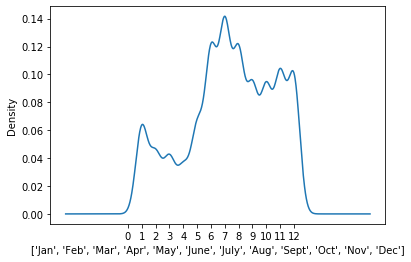

In [45]:
plt.xticks(np.arange(0, 13, 1.0))
plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

shelter_df['DateTime'].dt.month.plot.density();
plt.show()

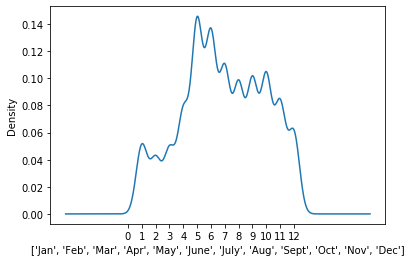

In [46]:
plt.xticks(np.arange(0, 13, 1.0))
plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

shelter_df['Intake DateTime'].dt.month.plot.density();
plt.show()

I want to standardize my data by age range but unfortunately that's something that's outside of the scope of this build week and is covered in the next unit - so I'm binning my values instead (:

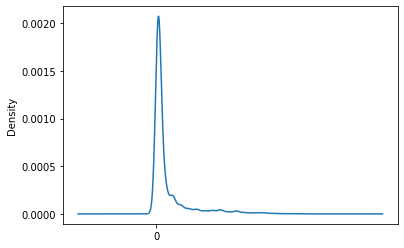

In [47]:
plt.xticks(np.arange(0, 5, 90.0))
#plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
shelter_df['Age Upon Outcome DT'].dt.days.plot.density();
#shelter_df['Intake DateTime'].dt.month.plot.density();
plt.show()

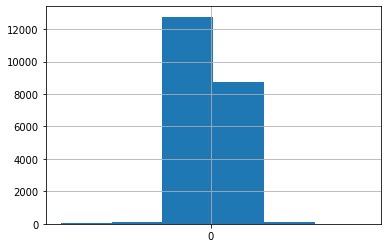

In [48]:
plt.xticks(np.arange(0, 20, 20.0))
#plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
shelter_df['Duration Of Stay'].dt.days.hist(bins = 6)
#shelter_df['Intake DateTime'].dt.month.plot.density();
plt.show()

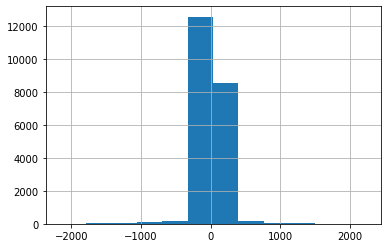

In [49]:
shelter_df['Duration Of Stay'].dt.days.hist(bins = 12);

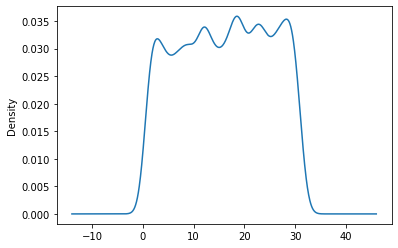

In [50]:
pd.to_datetime(shelter_df['DateTime']).dt.day.plot.density();

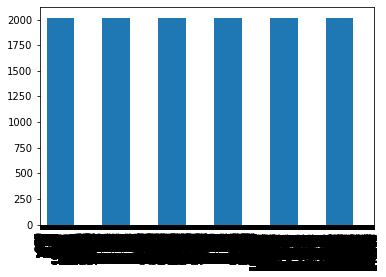

In [51]:
pd.to_datetime(shelter_df['DateTime']).dt.year.plot.density();
#pd.to_datetime(shelter_df['DateTime']).dt.year.plot.bar(); # Whoops, year is the height

In [0]:
#shelter_df['age_group'].value_counts()

I don't think that's good enough - I think there are too many bins for the older cats given their very low population counts

In [53]:
#Teen removed due to lack of age range 
#shelter_df['binned_outcome_age_(years)'] = pd.cut(x = shelter_df['outcome_age_(years)'], bins = [0, 0.5, 1.0, 1.5, 2.0, 4.0, 8.0, 22.0], labels = ['baby', 'kitten', 'teen', 'adult', 'Older Adult', 'Midlife', 'Twilight'])
shelter_df['binned_outcome_age_(years)'] = pd.cut(x = pd.to_datetime(shelter_df['Age upon Outcome']).dt.years, bins = [0, 0.5, 1.0, 2.0, 4.0, 8.0, 22.0], labels = ['baby', 'kitten', 'adult', 'Older Adult', 'Midlife', 'Twilight'])

ValueError: ignored

I've chosen these years because I believe that 0 - 0.5 is seen as a cat in need of fostering, 0.5 - 1.0 is seen as a perfect cat capable of adapting to a new home and is "truly yours" because it's likely never had another home / is very young, 1.0 - 1.5 is barely outside of that range, 1.5 - 2.0 is an adult cat, 2.0 - 4.0 is likely seen as a cat set in their ways and sad because they're losing their previous lifestyle or home, 4.0 - 8.0 is their last hurrah, and 8 - 22 is seen as an old, on their way to the grave cat.

Are these true facts? Don't know - I don't speak for everyone - but I think it's a fair opening opinion. Ideally I'd like to look at the data and see what the data says before inserting my own opinion but this is necessary right now (:

In [0]:
shelter_df['binned_outcome_age_(years)'].head(10)

In [0]:
shelter_df['binned_outcome_age_(years)'].value_counts()

In [0]:
shelter_df['binned_outcome_age_(years)'].hist(bins = 6)

In [0]:
shelter_df.head(100)

So apparently the Teen age range doesn't exist. Oh well. Dropped it and re-ran the notebook.

- What day of the week is most popular outgoing?

- Incoming?

- What month of the year is the most popular?

- Least?




In [0]:
shelter_df['datetime'].dtypes

In [0]:
shelter_df['datetime'] = shelter_df['datetime'].replace({'?':np.NaN})

In [0]:
shelter_df['datetime'].isna().sum()

In [0]:
shelter_df['datetime'].isnull().sum()

In [0]:
#shelter_df['datetime'] = shelter_df['datetime'][~np.isnan(shelter_df['datetime'])]

In [0]:
#shelter_df['datetime'].plot.density();

In [0]:
#shelter_df['datetime'].dt.year.plot.density();

In [0]:
#pd.to_datetime(shelter_df['datetime']).plot.density();

In [0]:
plt.xticks(np.arange(0, 13, 1.0))
plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
pd.to_datetime(shelter_df['datetime']).dt.month.plot.density();
plt.show()

There's a very obvious spike from April through July that carries through to January before dipping back down. July is the highest spike and therefor is the most popular month for incoming cats. February-March appears to be the least popular.

In [0]:
pd.to_datetime(shelter_df['datetime']).dt.month.value_counts().sort_index()

In [0]:
pd.to_datetime(shelter_df['datetime']).dt.month.value_counts().unique()

So with these two combined I can determine that July is, in fact, the busiest but that June, August, and October are close behind.

By far February and March are the worst, with only April and January even close - and yes, it turns out that January doesn't perform all that well.

In [0]:
pd.to_datetime(shelter_df['datetime']).dt.day.value_counts().sort_index()

In [0]:
pd.to_datetime(shelter_df['datetime']).dt.day.value_counts().unique()

In [0]:
pd.to_datetime(shelter_df['datetime']).dt.day.plot.density();

There's generally a trend upward as the month goes on but the absolute value difference isn't all that high. There aren't many months with 31 days so it makes sense that there would be fewer overall incoming on that (usually non-existant) day of the average month.

In [0]:
shelter_df['outcome_weekday'].value_counts().sort_index()

In [0]:
shelter_df['outcome_type'].value_counts()

I just want to take a second to point out that you're more likely to die before your owner actually comes for you. That's a "big oof". What's interesting, however, is that 5% of all the cats are euthanized and 1.36% die. Beyond that, 5% are returned to their owners and while 43% are adopted, 45.2% are transferred out of the facility.

In [0]:
condition = shelter_df['outcome_type'] == 'Missing'
shelter_df['outcome_type'][condition]

In [0]:
shelter_df['name'][condition]

In [0]:
shelter_df['breed'][condition]

In [0]:
shelter_df['binned_outcome_age_(years)'][condition]

Well, as for the ones that are stolen or "escape", it appears that being 6 months old or younger and a domestic shorthair are the most popular targets :3

In [0]:
shelter_df['sex'].value_counts()

More Females than males

In [0]:
condition = shelter_df['outcome_type'] == 'Euthanasia'
shelter_df['outcome_type'][condition]

In [0]:
shelter_df['sex'][condition].value_counts()

In [0]:
shelter_df['binned_outcome_age_(years)'][condition].value_counts()

Apparently, in raw absolute values, there are more kittens and baby cats that are euthanized than Twilight or any of the other categories. Given the significant population difference, however, that's not exactly as huge a surprise as one would think.

In [0]:
'''
Baby           17966
Kitten          4636
Adult           2455
Midlife         1625
Older Adult     1554
Twilight        1135

baby           575
Twilight       209
kitten         201
adult          179
Midlife        166
Older Adult    119
'''

print('Baby: ', (575 / 17966) )
print('Kitten: ', (201 / 4636) )
print('Adult: ', (179 / 2455) )
print('Midlife: ', (166 / 1625) )
print('Older Adult: ', (119 / 1554) )
print('Twilight: ', (209 / 1135) )

```
Baby:        3.2%

Kitten:      4.33%

Adult:       7.29%

Older Adult: 7.657%

Midlife:     10.21%

Twilight:    18.41%
```

So, yeah, there's a pretty strong positive correlation between age and the odds you're gonna be euthanized.

What about the time you're brought in?
What about the length of time you've stayed?

In [0]:
# Looking to graph date brought in (month) against Euthanized 
plt.xticks(np.arange(0, 13, 1.0))
plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
pd.to_datetime(shelter_df['datetime'][condition]).dt.month.plot.density();
plt.show()

In [0]:
plt.xticks(np.arange(0, 13, 1.0))
plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
pd.to_datetime(shelter_df['datetime']).dt.month.plot.density();
plt.show()

Generally it appears that the population influx follows the incoming curve, albeit with fewer spikes but there's also less data so a smoother curve is expected. 

So, unfortunately, it looks like intake data is unavailable - and "period range" has no correlation to anything? Comparing, say, a cat that was outgoing at the end of the month or beginning of the month, with a period range of 30 or 60 days, the date is only month-accurate but it's always the exact same month and year. There doesn't appear to be any way to determine how long a cat has been in the shelter beyond potentially trying to deduce some information from date of birth but, overall, it looks like I mistakenly thought there was a column for intake date. 

...BUUUUUT :D I googled for it and found it! :D It's actually EVEN MORE data! Going to see if there's an up to date outgoing dataset as well! 

...OMG YES! :DDD